In [1]:
import sys
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file = "reddit-counts.json.gz"

In [3]:
reddit_fh = gzip.open(file, 'rt', encoding='utf-8')
reddits = pd.read_json(reddit_fh, lines=True)

In [4]:
reddits = reddits[(reddits["subreddit"]== 'canada')]

In [5]:
def date_year(date):
    return date.year

In [6]:
reddits["year"] = reddits["date"].apply(date_year)
reddits = reddits[(reddits["year"] == 2012)|(reddits["year"] == 2013)]

In [7]:
def date_weekday(date):
    return date.weekday()

In [8]:
reddits["weekday"] = reddits["date"].apply(date_weekday)
weekdays = pd.DataFrame(reddits[(reddits["weekday"] < 5)])
weekends = pd.DataFrame(reddits[(reddits["weekday"] >= 5)])

In [9]:
OUTPUT_TEMPLATE = (
    "Initial (invalid) T-test p-value: {initial_ttest_p:.3g}\n"
    "Original data normality p-values: {initial_weekday_normality_p:.3g} {initial_weekend_normality_p:.3g}\n"
    "Original data equal-variance p-value: {initial_levene_p:.3g}\n"
    "Transformed data normality p-values: {transformed_weekday_normality_p:.3g} {transformed_weekend_normality_p:.3g}\n"
    "Transformed data equal-variance p-value: {transformed_levene_p:.3g}\n"
    "Weekly data normality p-values: {weekly_weekday_normality_p:.3g} {weekly_weekend_normality_p:.3g}\n"
    "Weekly data equal-variance p-value: {weekly_levene_p:.3g}\n"
    "Weekly T-test p-value: {weekly_ttest_p:.3g}\n"
    "Mann–Whitney U-test p-value: {utest_p:.3g}"
)

In [10]:
initial_ttest_p = stats.ttest_ind(weekdays["comment_count"],weekends["comment_count"]).pvalue
initial_weekday_normality_p = stats.normaltest(weekdays["comment_count"]).pvalue
initial_weekend_normality_p = stats.normaltest(weekends["comment_count"]).pvalue
initial_levene_p = stats.levene(weekdays["comment_count"], weekends["comment_count"]).pvalue

In [11]:
print(initial_ttest_p)
print(initial_weekday_normality_p)
print(initial_weekend_normality_p)
print(initial_levene_p)

1.30055028472e-58
1.00911372517e-07
0.00152091968596
0.043787409892


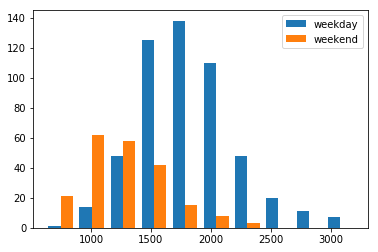

In [12]:
plt.hist([weekdays["comment_count"], weekends["comment_count"]])
plt.legend(["weekday", "weekend"])
plt.show()

In [13]:
trans_weekday = np.sqrt(weekdays["comment_count"])
trans_weekend = np.sqrt(weekends["comment_count"])
transformed_weekday_normality_p = stats.normaltest(trans_weekday).pvalue
transformed_weekend_normality_p = stats.normaltest(trans_weekend).pvalue
transformed_levene_p = stats.levene(trans_weekday, trans_weekend).pvalue

In [14]:
print(transformed_weekday_normality_p)
print(transformed_weekend_normality_p)
print(transformed_levene_p)

0.0368722161337
0.107605628947
0.556054429752


In [15]:
 def iso_year(date):
    return date.isocalendar()[0]

In [16]:
def week_num(date):
    date = pd.to_datetime(date)
    return date.isocalendar()[1]

In [17]:
weekdays["isoyear"] = weekdays["date"].apply(iso_year)
weekdays["weekno"] = weekdays["date"].apply(week_num)
weekends["isoyear"] = weekends["date"].apply(iso_year)
weekends["weekno"] = weekends["date"].apply(week_num)

In [18]:
grouped_weekdays = weekdays.groupby(["isoyear", "weekno"])
mean_weekdays = grouped_weekdays.aggregate('mean').reset_index()
grouped_weekends = weekends.groupby(["isoyear", "weekno"])
mean_weekends = grouped_weekends.aggregate('mean').reset_index()

In [19]:
weekly_weekday_normality_p=stats.normaltest(mean_weekdays["comment_count"]).pvalue
weekly_weekend_normality_p=stats.normaltest(mean_weekends["comment_count"]).pvalue
weekly_levene_p=stats.levene(mean_weekdays["comment_count"], mean_weekends["comment_count"]).pvalue
weekly_ttest_p=stats.ttest_ind(mean_weekdays["comment_count"], mean_weekends["comment_count"]).pvalue

In [20]:
print(weekly_weekday_normality_p)
print(weekly_weekend_normality_p)
print(weekly_levene_p)
print(weekly_ttest_p)

0.308263739083
0.152949247171
0.203837880836
1.33536560523e-34


In [21]:
utest_p = stats.mannwhitneyu(weekdays["comment_count"], weekends["comment_count"]).pvalue

In [22]:
print(utest_p)

4.31222661737e-53


In [23]:
print(OUTPUT_TEMPLATE.format(
        initial_ttest_p = initial_ttest_p,
        initial_weekday_normality_p = initial_weekday_normality_p,
        initial_weekend_normality_p = initial_weekend_normality_p,
        initial_levene_p = initial_levene_p,
        transformed_weekday_normality_p = transformed_weekday_normality_p,
        transformed_weekend_normality_p = transformed_weekend_normality_p,
        transformed_levene_p = transformed_levene_p,
        weekly_weekday_normality_p = weekly_weekday_normality_p,
        weekly_weekend_normality_p = weekly_weekend_normality_p,
        weekly_levene_p = weekly_levene_p,
        weekly_ttest_p = weekly_ttest_p,
        utest_p = utest_p
    ))

Initial (invalid) T-test p-value: 1.3e-58
Original data normality p-values: 1.01e-07 0.00152
Original data equal-variance p-value: 0.0438
Transformed data normality p-values: 0.0369 0.108
Transformed data equal-variance p-value: 0.556
Weekly data normality p-values: 0.308 0.153
Weekly data equal-variance p-value: 0.204
Weekly T-test p-value: 1.34e-34
Mann–Whitney U-test p-value: 4.31e-53


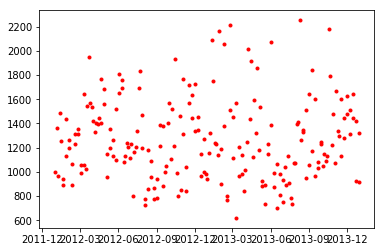

In [32]:
plt.plot(weekends["date"], weekends["comment_count"], 'r.')
plt.show()

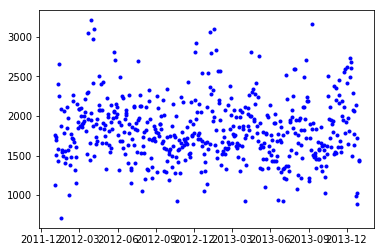

In [28]:
plt.plot(weekdays["date"], weekdays["comment_count"], 'b.')
plt.show()

In [31]:
weekdays.sort_values("comment_count", ascending=False)

,comment_count,date,subreddit,year,weekday,isoyear,weekno
13430,3210,2012-03-29,canada,2012,3,2012,13
4690,3157,2013-09-10,canada,2013,1,2013,37
13234,3098,2013-01-17,canada,2013,3,2013,3
6669,3097,2012-04-05,canada,2012,3,2012,14
5152,3064,2013-01-08,canada,2013,1,2013,2
7431,3051,2012-03-21,canada,2012,2,2012,12
10274,2969,2012-04-04,canada,2012,2,2012,14
3635,2924,2012-12-06,canada,2012,3,2012,49
6994,2833,2013-01-22,canada,2013,1,2013,4
9402,2811,2012-12-04,canada,2012,1,2012,49
